In [ ]:
from djchurchland import *
from djchurchland.schema import * # Imports all schemas from the database
from djchurchland.utils import *
from djchurchland.chipmunk.psychometric import PsychometricFit
from chiCa.chiCa import separate_axes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import uniform_filter1d

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)
plt.rcParams['font.sans-serif'] = ['Arial'] 
plt.rcParams['font.size'] = 12

# save_dir = '/Users/gabriel/Desktop/BSN_figures/'

%matplotlib widget
%load_ext autoreload
%autoreload 2

[2025-08-13 17:59:14,140][INFO]: Connecting gabriel@localhost:3306
[2025-08-13 17:59:14,152][INFO]: Connected gabriel@localhost:3306


In [2]:
good_trials = (Chipmunk.Trial() & "subject_name = 'GRB046'" & "session_datetime LIKE '2025-08-12%'" & "with_choice = 1").fetch('trial_number')

initiation_time, pre_stim_time, response = (Chipmunk.Trial() & "subject_name = 'GRB046'" & "session_datetime LIKE '2025-08-12%'" & f'trial_number IN {tuple(good_trials)}').fetch(
    "initiation_time", "pre_stim_time", "response")

rewarded, response_time = (Chipmunk.Trial() & "subject_name = 'GRB046'" & "session_datetime LIKE '2025-08-12%'" & "with_choice = 1").fetch(
    "rewarded", "response_time")

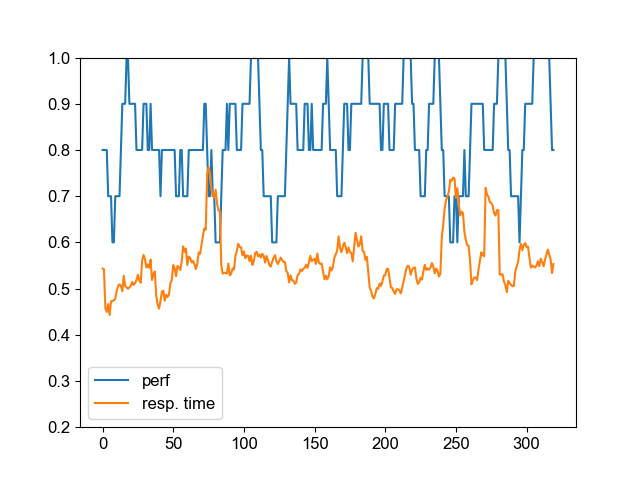

In [3]:
weights = np.ones(10)/10

rw_avg = np.convolve(rewarded, weights, mode='valid')
rt_avg = np.convolve(response_time, weights, mode='valid')

plt.figure()
plt.plot(rw_avg, label='perf')
plt.plot(rt_avg, label = 'resp. time')
plt.ylim([0.2, 1])
plt.legend();

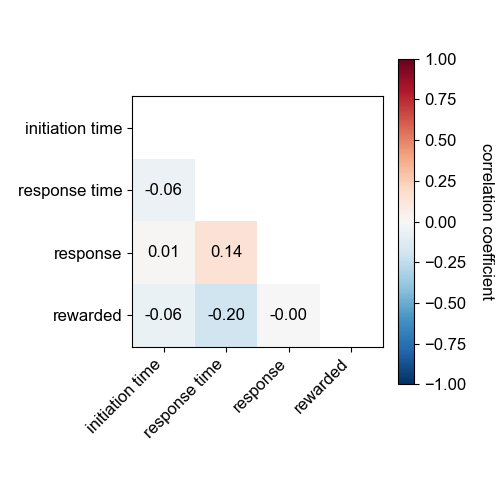

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))

data = np.array([initiation_time, response_time, response, rewarded])
labels = ['initiation time', 'response time', 'response', 'rewarded']

corr_matrix = np.corrcoef(data)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
masked_corr = np.ma.masked_array(corr_matrix, mask=mask)

im = ax.imshow(masked_corr, cmap='RdBu_r', vmin=-1, vmax=1, aspect='equal')
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        if i > j:
            text = ax.text(j, i, f'{corr_matrix[i, j]:.2f}',
                          ha='center', va='center', 
                          color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black')

cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('correlation coefficient', rotation=270, labelpad=20)
plt.tight_layout()
